In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [6]:
baseball=pd.read_csv('baseballs.csv')
baseball.head()

,batting_average,runs_scored,doubles_at_bat,triples_at_bat,home_runs,strike_outs
0,0.283,0.144,0.049,0.012,0.013,0.086
1,0.276,0.125,0.039,0.013,0.002,0.062
2,0.281,0.141,0.045,0.021,0.013,0.074
3,0.328,0.189,0.043,0.001,0.030,0.032
4,0.290,0.161,0.044,0.011,0.070,0.076


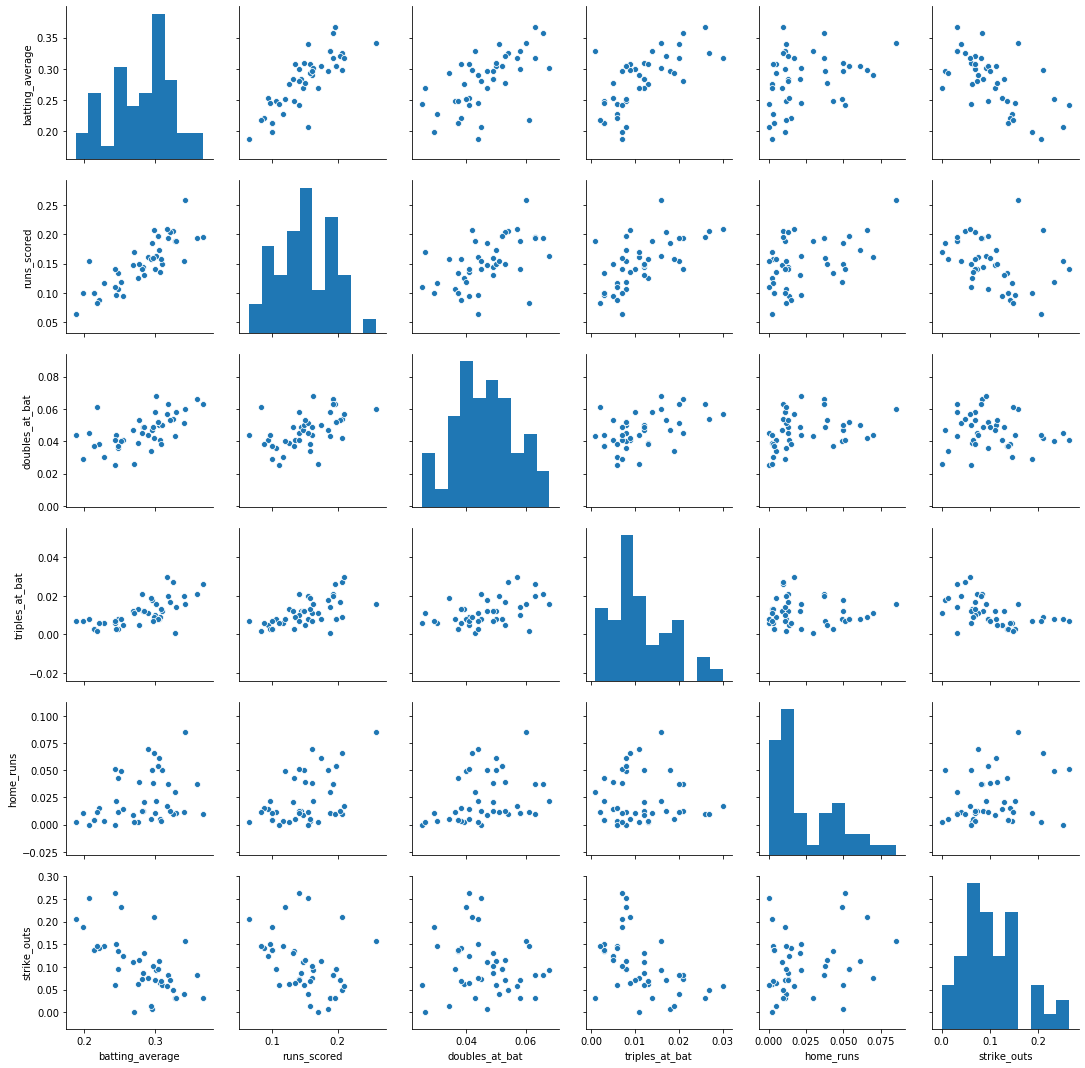

In [6]:
sns.pairplot(baseball)

In [7]:
baseball.corr()

,batting_average,runs_scored,doubles_at_bat,triples_at_bat,home_runs,strike_outs
batting_average,1.000000,0.824952,0.609021,0.661613,0.336292,-0.621324
runs_scored,0.824952,1.000000,0.517059,0.598672,0.496198,-0.365957
doubles_at_bat,0.609021,0.517059,1.000000,0.486912,0.298506,-0.156817
triples_at_bat,0.661613,0.598672,0.486912,1.000000,-0.037183,-0.486873
home_runs,0.336292,0.496198,0.298506,-0.037183,1.000000,0.197148
strike_outs,-0.621324,-0.365957,-0.156817,-0.486873,0.197148,1.000000


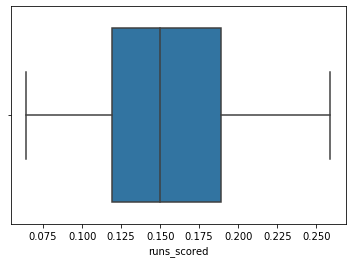

In [21]:
sns.boxplot(x='runs_scored',data=baseball)

In [7]:
y=baseball['runs_scored']
X=baseball.drop('runs_scored',axis=1)
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            runs_scored   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     26.17
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.70e-11
Time:                        09:34:54   Log-Likelihood:                 112.40
No. Observations:                  45   AIC:                            -212.8
Df Residuals:                      39   BIC:                            -202.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0572      0.041     

In [8]:
y=baseball['runs_scored']
X=baseball.drop(['runs_scored','strike_outs'],axis=1)
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            runs_scored   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     32.50
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           4.40e-12
Time:                        09:34:54   Log-Likelihood:                 111.86
No. Observations:                  45   AIC:                            -213.7
Df Residuals:                      40   BIC:                            -204.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0264      0.026     

In [9]:
y=baseball['runs_scored']
X=baseball.drop(['runs_scored','strike_outs','doubles_at_bat'],axis=1)
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            runs_scored   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     43.91
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           7.19e-13
Time:                        09:34:54   Log-Likelihood:                 111.66
No. Observations:                  45   AIC:                            -215.3
Df Residuals:                      41   BIC:                            -208.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0298      0.025     

In [10]:
y=baseball['runs_scored']
X=baseball.drop(['runs_scored','strike_outs','doubles_at_bat'],axis=1)
model=sm.OLS(y,X)
result=model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:            runs_scored   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              794.8
Date:                Tue, 22 Oct 2019   Prob (F-statistic):                    5.27e-37
Time:                        09:34:54   Log-Likelihood:                          110.88
No. Observations:                  45   AIC:                                     -215.8
Df Residuals:                      42   BIC:                                     -210.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

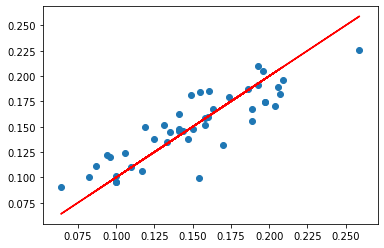

In [11]:
y_pred=result.predict(X)
plt.plot(y,y,'r')
plt.scatter(y,y_pred)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
print('Score for Train Set: ',regressor.score(X_train, y_train))
print('Score for Test Set: ',regressor.score(X_test, y_test))

(30, 3)
(15, 3)
(30,)
(15,)
Score for Train Set:  0.8593655939507964
Score for Test Set:  0.32715200237063125
